### Importando os pacotes

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pingouin as pg
import mplcyberpunk


### Carregando os datasets

In [36]:
bundesliga = pd.read_csv("bundesliga_jogadores.csv")
eredivisie =pd.read_csv("eredivisie_jogadores.csv")
la_liga=pd.read_csv("la_liga_jogadores.csv")
league_one=pd.read_csv("league_one_jogadores.csv")
premier_league=pd.read_csv("premier_league_jogadores.csv")
primera_liga=pd.read_csv("primera_liga_jogadores.csv")

### Criando variável "País" para diferenciar cada liga

In [37]:
bundesliga["Pais"]=0
eredivisie["Pais"]=1
la_liga["Pais"]=2
league_one["Pais"]=3 
premier_league["Pais"]=4
primera_liga["Pais"]=5

### Concatenando os datasets e transformando a variável país em "category"

In [41]:
todos_jogadores = pd.concat([bundesliga,eredivisie,la_liga,league_one,premier_league,primera_liga],axis=0,ignore_index=True)
todos_jogadores["Pais"] = todos_jogadores["Pais"].astype("category")

### Arrumando o campo "nação"

In [39]:
todos_jogadores["Nacao"]

0       us USA
1       us USA
2       at AUT
3       am ARM
4       de GER
         ...  
3293    uy URU
3294    br BRA
3295    br BRA
3296    ru RUS
3297    ba BIH
Name: Nacao, Length: 3298, dtype: object

In [40]:
todos_jogadores["Nacao"] = todos_jogadores["Nacao"].str[3:]

todos_jogadores["Nacao"].head()

0    USA
1    USA
2    AUT
3    ARM
4    GER
Name: Nacao, dtype: object

### Análisando meu banco de dados

In [42]:
todos_jogadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3298 entries, 0 to 3297
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Jogador                        3298 non-null   object  
 1   Nacao                          3283 non-null   object  
 2   Posicao                        3298 non-null   object  
 3   Equipe                         3298 non-null   object  
 4   Idade                          3288 non-null   float64 
 5   Jogos_disputados               3298 non-null   int64   
 6   Jogos_iniciados                3298 non-null   int64   
 7   Gols                           3298 non-null   int64   
 8   Assistencias                   3298 non-null   int64   
 9   Penaltis_batidos               3298 non-null   int64   
 10  Penaltis_convertidos           3298 non-null   int64   
 11  Amarelos                       3298 non-null   int64   
 12  Vermelhos                      329

#### Observando quais as variáveis com entradas nulas

In [43]:
todos_jogadores.isnull().sum().sort_values(ascending=False)

Nacao                            15
Idade                            10
Passes_progressivos_recebidos     3
Passes_progressivos               3
Carregadas_progressivas           3
Xag                               3
Xg                                3
Jogador                           0
Amarelos                          0
Vermelhos                         0
Penaltis_batidos                  0
Penaltis_convertidos              0
Assistencias                      0
Gols                              0
Jogos_iniciados                   0
Jogos_disputados                  0
Equipe                            0
Posicao                           0
Pais                              0
dtype: int64

### "Dropando" as observações que possuem valores nulos

In [44]:
todos_jogadores=todos_jogadores.dropna()

### Criando Uma banco de dados que possui apenas os atacantes

In [46]:
mask_atacantes=todos_jogadores["Posicao"].str.contains("AT")

In [47]:
atacantes=todos_jogadores[mask_atacantes]

### Separando as observações que possuem valores numéricos

In [48]:
colunas_num=atacantes.columns[atacantes.dtypes !="object"]

In [49]:
atacantes_numericos = atacantes.loc[:,colunas_num]

In [50]:
atacantes_numericos=atacantes_numericos.drop("Pais",axis=1)

### Criando um Boxplot para analisar como está a distriuição das variáveis

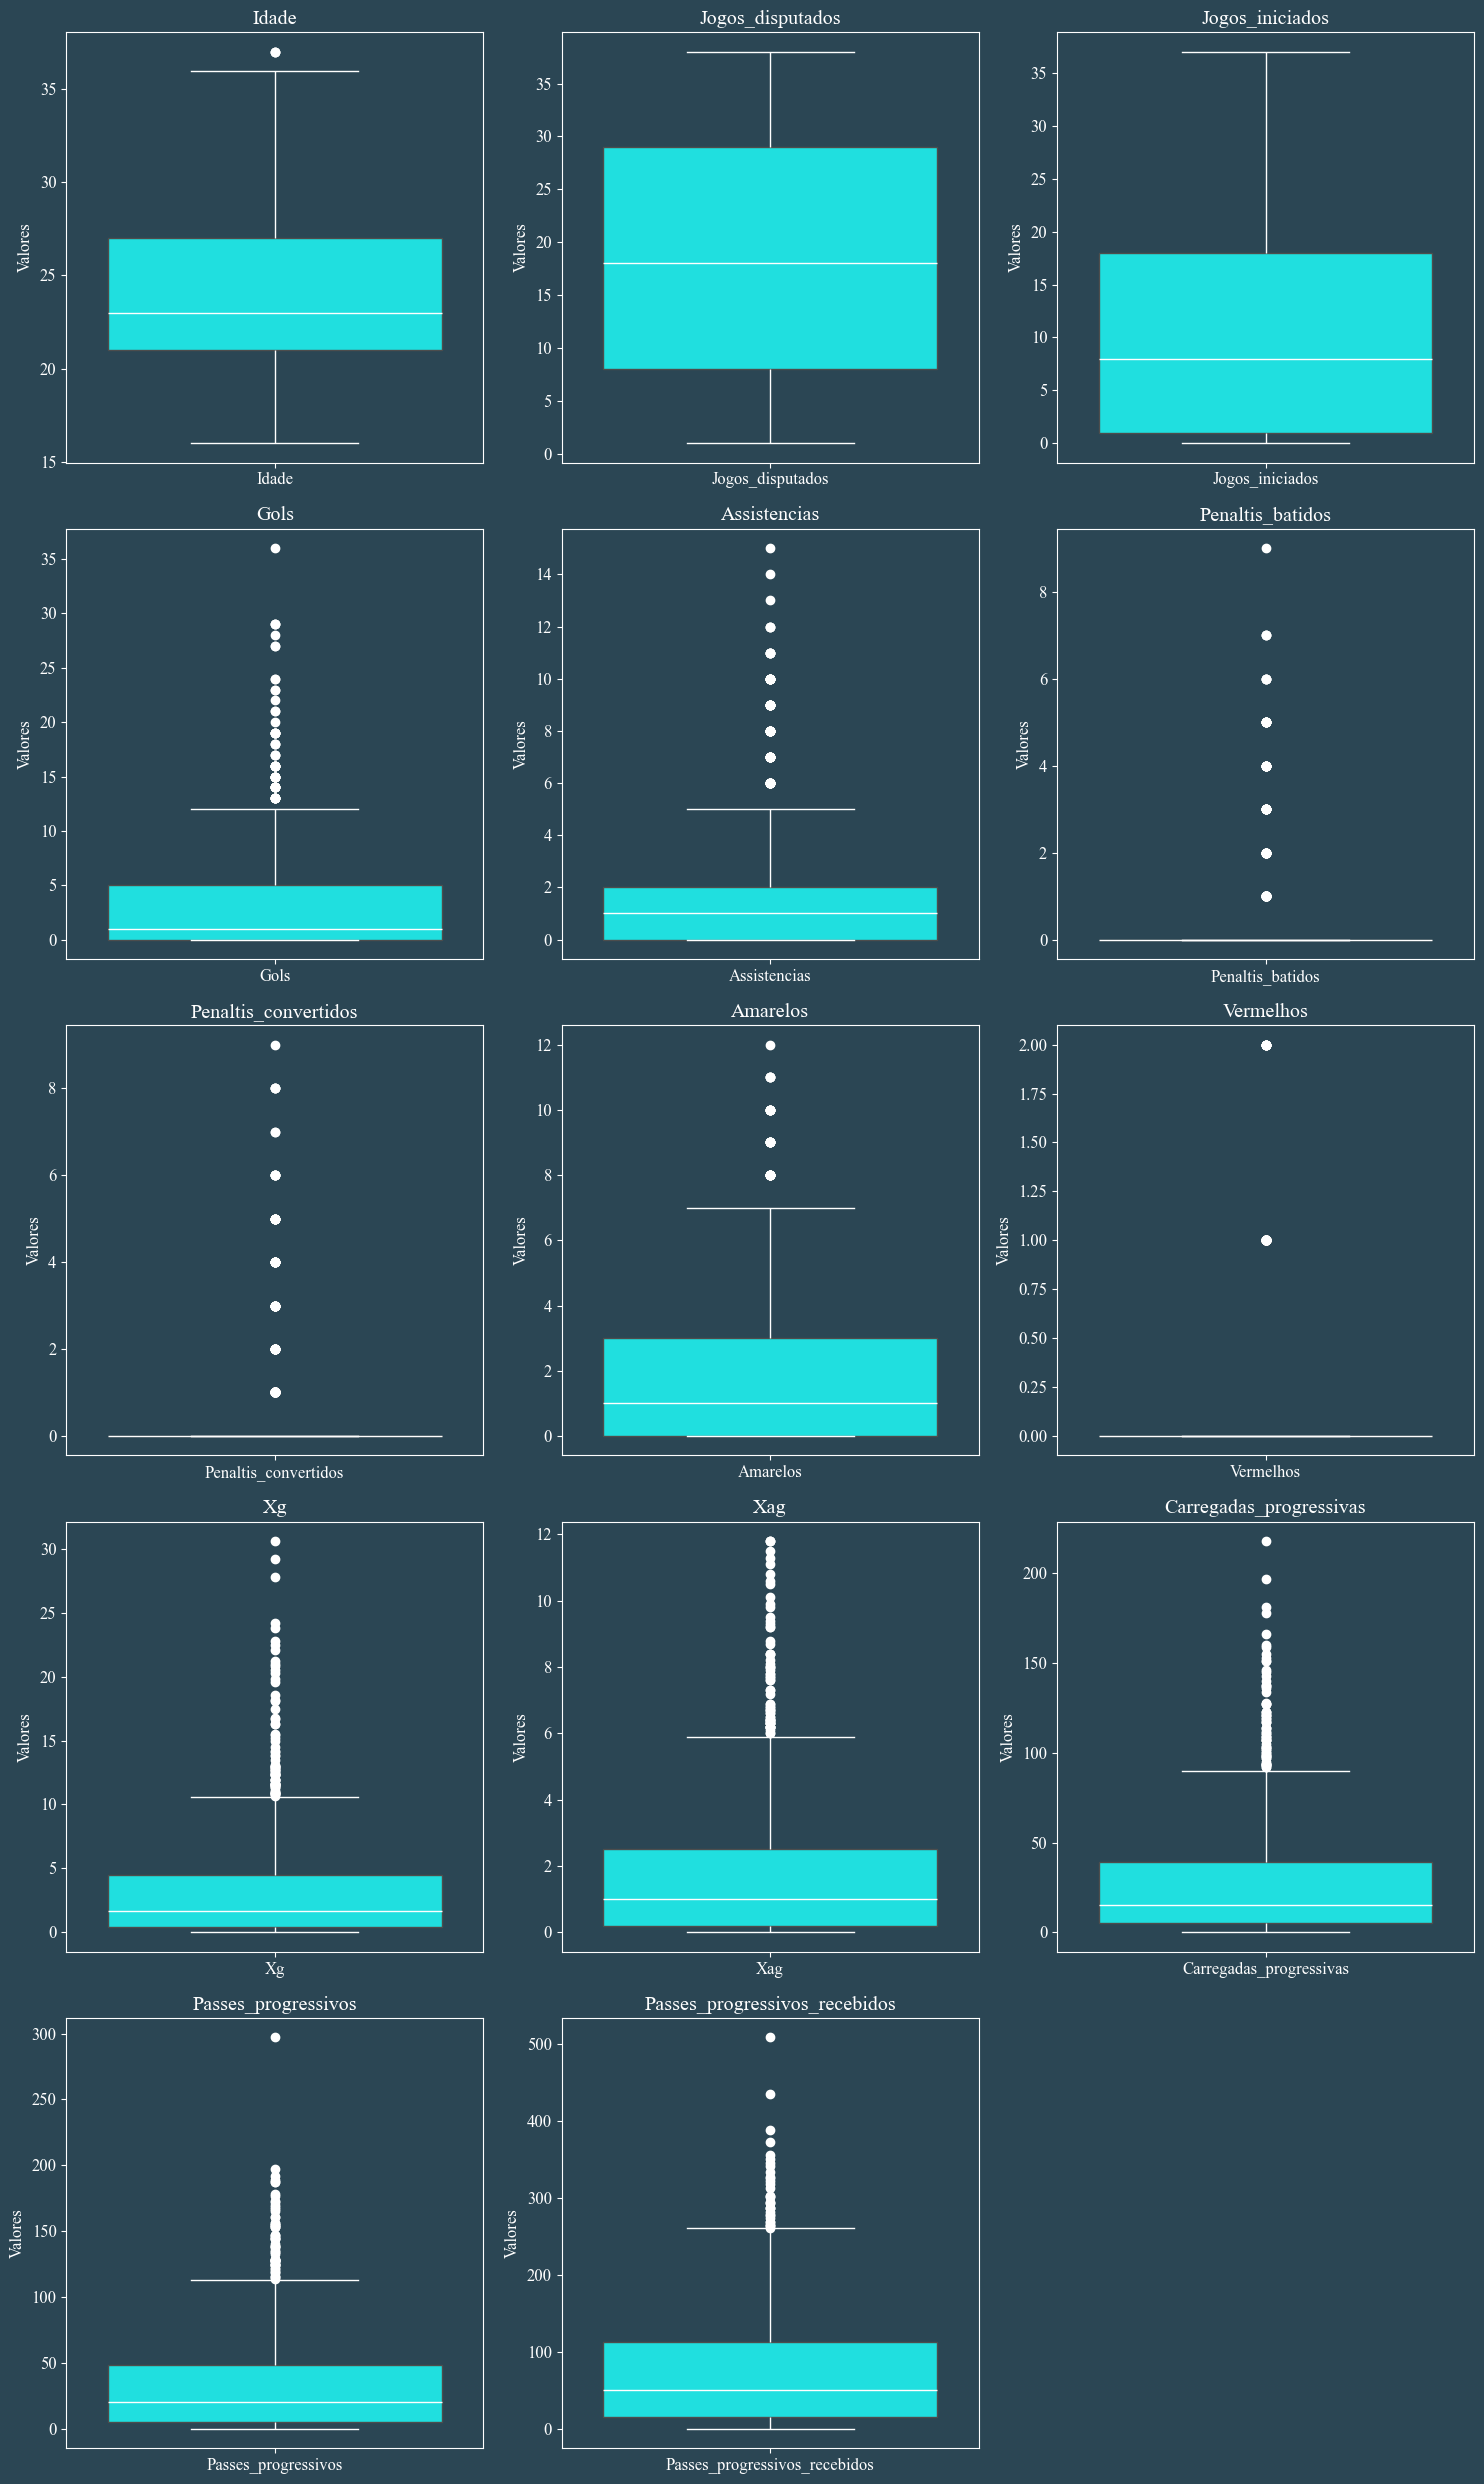

In [69]:
# Derretendo o DataFrame
data_melted = pd.melt(atacantes_numericos)

# Número de variáveis (boxplots) que você tem
num_vars = len(data_melted['variable'].unique())

# Número de colunas por linha
num_cols = 3

# Calcula o número de linhas necessárias
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

# Configurações de fontes
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 12

# Configuração das cores
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#2b4654'  # bluish dark grey

# Definindo o tamanho da figura com base no número de linhas e colunas
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 5, num_rows * 5))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plotando cada variável
for i, var in enumerate(data_melted['variable'].unique()):
    sns.boxplot(x='variable', y='value', hue='variable', data=data_melted[data_melted['variable'] == var], ax=axes[i], palette=["#00FFFF"])
    axes[i].set_title(var, color="white")
    axes[i].set_xlabel('', color="white")
    axes[i].set_ylabel('Valores', color="white")
    
    # Customizando a cor das linhas do boxplot para branco
    for artist in axes[i].artists:
        artist.set_edgecolor("white")
        for line in artist.lines:
            line.set_color("white")

    # Ajustando a cor dos pontos de outliers
    for line in axes[i].lines:
        line.set_color("white")
        if line.get_linestyle() == 'None':  # Outliers
            line.set_markerfacecolor("white")
            line.set_markeredgecolor("white")

    # Ajustando as cores dos spines (bordas do gráfico)
    for spine in axes[i].spines.values():
        spine.set_edgecolor("white")

    # Ajustando a cor dos ticks e labels
    axes[i].tick_params(colors='white', which='both')  # Eixos

# Remover eixos vazios
for ax in axes[num_vars:]:
    fig.delaxes(ax)

# Ajustando o layout
plt.tight_layout()
plt.show()

### Padronizando os valores do meu banco de dados numérico
A padronização é necessária para que todos os valores estejam na mesma escala

In [61]:
atacantes_pad = atacantes_numericos.apply(zscore,ddof=1)

### Utilizando o método de Elbox para ajudar a verificar a quantidade de cluster que posso ter

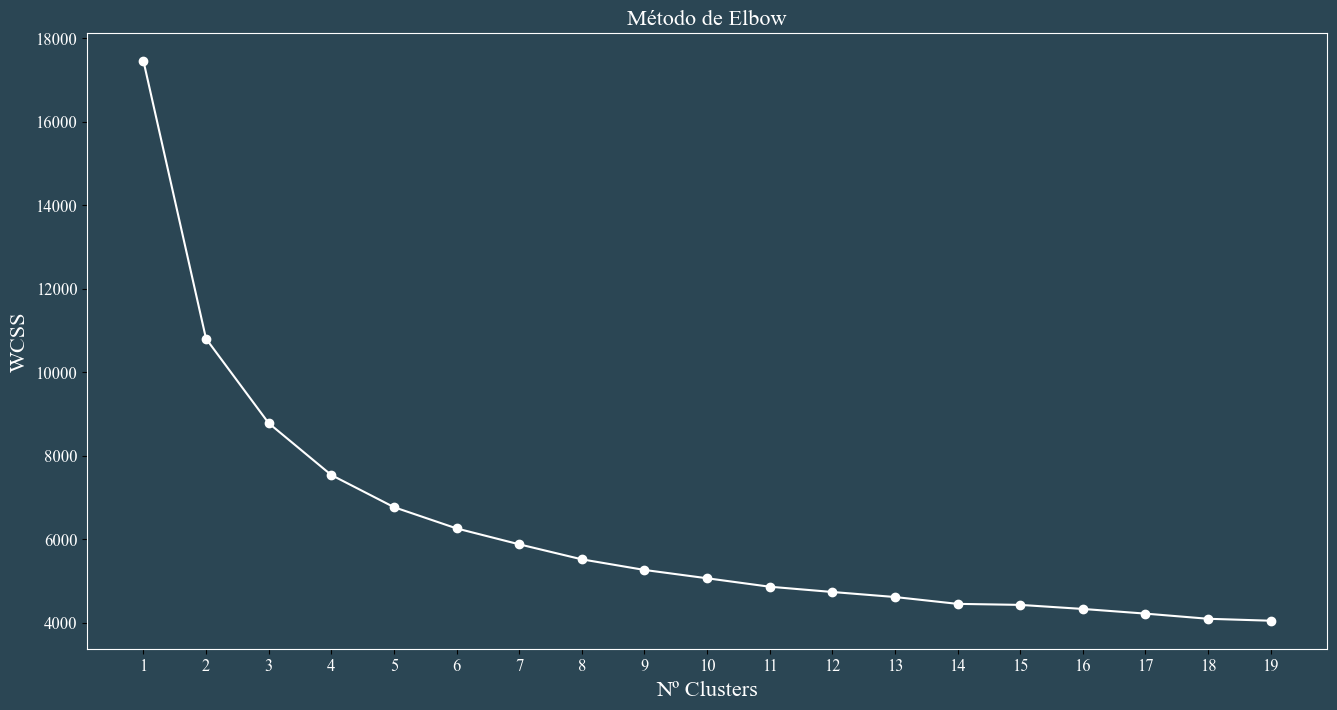

In [78]:
elbow = []
K = range(1,20) # ponto de parada pode ser parametrizado manualmente
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=42 ).fit(atacantes_pad)
    elbow.append(kmeanElbow.inertia_)
    
plt.figure(figsize=(16, 8))
plt.plot(K, elbow, marker='o', color="white")  # Cor da linha
plt.xlabel('Nº Clusters', fontsize=16, color="white")  # Rótulo do eixo x
plt.xticks(range(1, 20), color="white")  # Rótulos dos ticks do eixo x
plt.ylabel('WCSS', fontsize=16, color="white")  # Rótulo do eixo y
plt.title('Método de Elbow', fontsize=16, color="white")  # Título do gráfico

# Ajustando as cores dos ticks do eixo y
plt.yticks(color="white")

# Ajustando as cores dos spines (bordas do gráfico)
for spine in plt.gca().spines.values():
    spine.set_color("white")

plt.show()

### Utilizando o método de "Silhueta" para ajudar a definir a quantidade de clusters

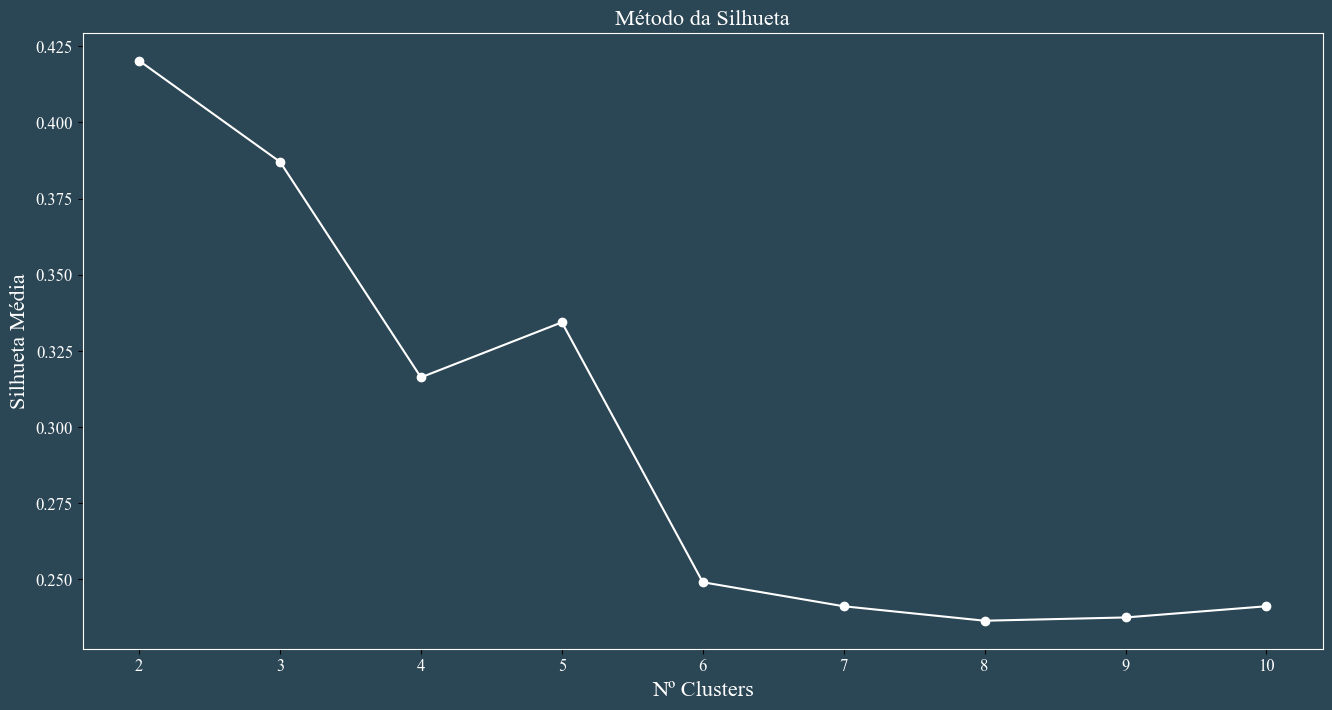

In [82]:
silhueta = []
I = range(2, 11)  # ponto de parada pode ser parametrizado manualmente
for i in I: 
    kmeansSil = KMeans(n_clusters=i, init='random', random_state=42).fit(atacantes_pad)
    silhueta.append(silhouette_score(atacantes_pad, kmeansSil.labels_))

# Criando o gráfico
plt.figure(figsize=(16, 8))
plt.plot(range(2, 11), silhueta, marker='o', color='white')  # Linhas em branco
plt.xlabel('Nº Clusters', fontsize=16, color='white')  # Eixo X em branco
plt.ylabel('Silhueta Média', fontsize=16, color='white')  # Eixo Y em branco
plt.title('Método da Silhueta', fontsize=16, color='white')  # Título em branco

# Ajustando as cores dos ticks
plt.xticks(color='white')  # Ticks do eixo X em branco
plt.yticks(color='white')  # Ticks do eixo Y em branco

# Ajustando as cores dos spines (bordas do gráfico)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('white')

plt.show()

### Duplicando o banco de dados atacantes e criando o modelo de Cluster Não Hierárquico K-means

In [84]:
atacantes_cluster=atacantes.copy()

In [85]:
kmeans_final = KMeans(n_clusters=4, init='random', random_state=42).fit(atacantes_pad)

# Gerando a variável para identificarmos os clusters gerados

kmeans_clusters = kmeans_final.labels_
atacantes_cluster['cluster_kmeans'] = kmeans_clusters
atacantes_pad['cluster_kmeans'] = kmeans_clusters
atacantes_cluster['cluster_kmeans'] = atacantes_cluster['cluster_kmeans'].astype('category')
atacantes_pad['cluster_kmeans'] = atacantes_pad['cluster_kmeans'].astype('category')
atacantes['cluster_kmeans'] = atacantes_pad['cluster_kmeans'].astype('category')

C:\Users\Cliente\AppData\Local\Temp\ipykernel_8656\3609401580.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atacantes['cluster_kmeans'] = atacantes_pad['cluster_kmeans'].astype('category')


### Utilizando a técnica de ANOVA para determinar se existem diferenças estatisticamente significativas entre as mpedias das variaveis com os nossos clusters

In [88]:
pg.anova(dv='Idade', 
         between='cluster_kmeans', 
         data=atacantes_pad,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,142.319829,1104.680171
DF,3,1244
MS,47.439943,0.888007
F,53.422964,NaN
p-unc,0.0,NaN
np2,0.11413,NaN


In [89]:
pg.anova(dv='Jogos_disputados', 
         between='cluster_kmeans', 
         data=atacantes_pad,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,912.140787,334.859213
DF,3,1244
MS,304.046929,0.269179
F,1129.532545,NaN
p-unc,0.0,NaN
np2,0.731468,NaN


In [90]:
pg.anova(dv='Jogos_iniciados', 
         between='cluster_kmeans', 
         data=atacantes_pad,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,1001.197907,245.802093
DF,3,1244
MS,333.732636,0.19759
F,1689.014901,NaN
p-unc,0.0,NaN
np2,0.802885,NaN


In [91]:
pg.anova(dv='Gols', 
         between='cluster_kmeans', 
        data=atacantes_pad,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,762.261197,484.738803
DF,3,1244
MS,254.087066,0.389661
F,652.0714,NaN
p-unc,0.0,NaN
np2,0.611276,NaN


In [92]:
pg.anova(dv='Assistencias', 
         between='cluster_kmeans', 
         data=atacantes_pad,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,734.96802,512.03198
DF,3,1244
MS,244.98934,0.411601
F,595.210359,NaN
p-unc,0.0,NaN
np2,0.589389,NaN


In [93]:
pg.anova(dv='Penaltis_batidos', 
         between='cluster_kmeans', 
         data=atacantes_pad,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,870.149341,376.850659
DF,3,1244
MS,290.04978,0.302935
F,957.466622,NaN
p-unc,0.0,NaN
np2,0.697794,NaN


In [94]:
pg.anova(dv='Penaltis_convertidos', 
         between='cluster_kmeans', 
         data=atacantes_pad,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,856.858907,390.141093
DF,3,1244
MS,285.619636,0.313618
F,910.723923,NaN
p-unc,0.0,NaN
np2,0.687136,NaN


In [95]:
pg.anova(dv='Amarelos', 
         between='cluster_kmeans', 
         data=atacantes_pad,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,450.593695,796.406305
DF,3,1244
MS,150.197898,0.640198
F,234.611635,NaN
p-unc,0.0,NaN
np2,0.361342,NaN


In [96]:
pg.anova(dv='Vermelhos', 
         between='cluster_kmeans', 
         data=atacantes_pad,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,37.572097,1209.427903
DF,3,1244
MS,12.524032,0.972209
F,12.882038,NaN
p-unc,0.0,NaN
np2,0.03013,NaN


In [97]:
pg.anova(dv='Xg', 
         between='cluster_kmeans', 
         data=atacantes_pad,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,801.784291,445.215709
DF,3,1244
MS,267.26143,0.35789
F,746.768841,NaN
p-unc,0.0,NaN
np2,0.642971,NaN


In [98]:
pg.anova(dv='Xag', 
         between='cluster_kmeans', 
         data=atacantes_pad,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,853.372649,393.627351
DF,3,1244
MS,284.45755,0.316421
F,898.985274,NaN
p-unc,0.0,NaN
np2,0.684341,NaN


In [99]:
pg.anova(dv='Carregadas_progressivas', 
         between='cluster_kmeans', 
         data=atacantes_pad,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,808.559653,438.440347
DF,3,1244
MS,269.519884,0.352444
F,764.716884,NaN
p-unc,0.0,NaN
np2,0.648404,NaN


In [100]:
pg.anova(dv='Passes_progressivos', 
         between='cluster_kmeans', 
         data=atacantes_pad,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,760.714536,486.285464
DF,3,1244
MS,253.571512,0.390905
F,648.678572,NaN
p-unc,0.0,NaN
np2,0.610036,NaN


In [101]:
pg.anova(dv='Passes_progressivos_recebidos', 
         between='cluster_kmeans', 
         data=atacantes_pad,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,926.073736,320.926264
DF,3,1244
MS,308.691245,0.257979
F,1196.573642,NaN
p-unc,0.0,NaN
np2,0.742641,NaN


### Nomeando os clusters

In [102]:
cluster_nomes = {
    0: "Grupo 1",
    1: "Grupo 2",
    2: "Grupo 3",
    3: "Grupo 4",
    4: "Grupo 5"}

atacantes_cluster["nome_cluster"] = atacantes_cluster["cluster_kmeans"].map(cluster_nomes)

### Criando um dataset só com o Mbappé e outro para os jogadores Mbappé, Harry Kane e Vinicius Júnior

In [103]:
mbappe_mask = atacantes["Jogador"].str.contains("Mbappé")

mbappe=atacantes[mbappe_mask]

In [104]:
atacantes_selecionados = atacantes_cluster.loc[atacantes_cluster["Jogador"].isin(["Vinicius Júnior","Kylian Mbappé","Harry Kane"])]

### Comparando os Gols e XG do Vinicius Jr, Mbappé e do Harry Kane

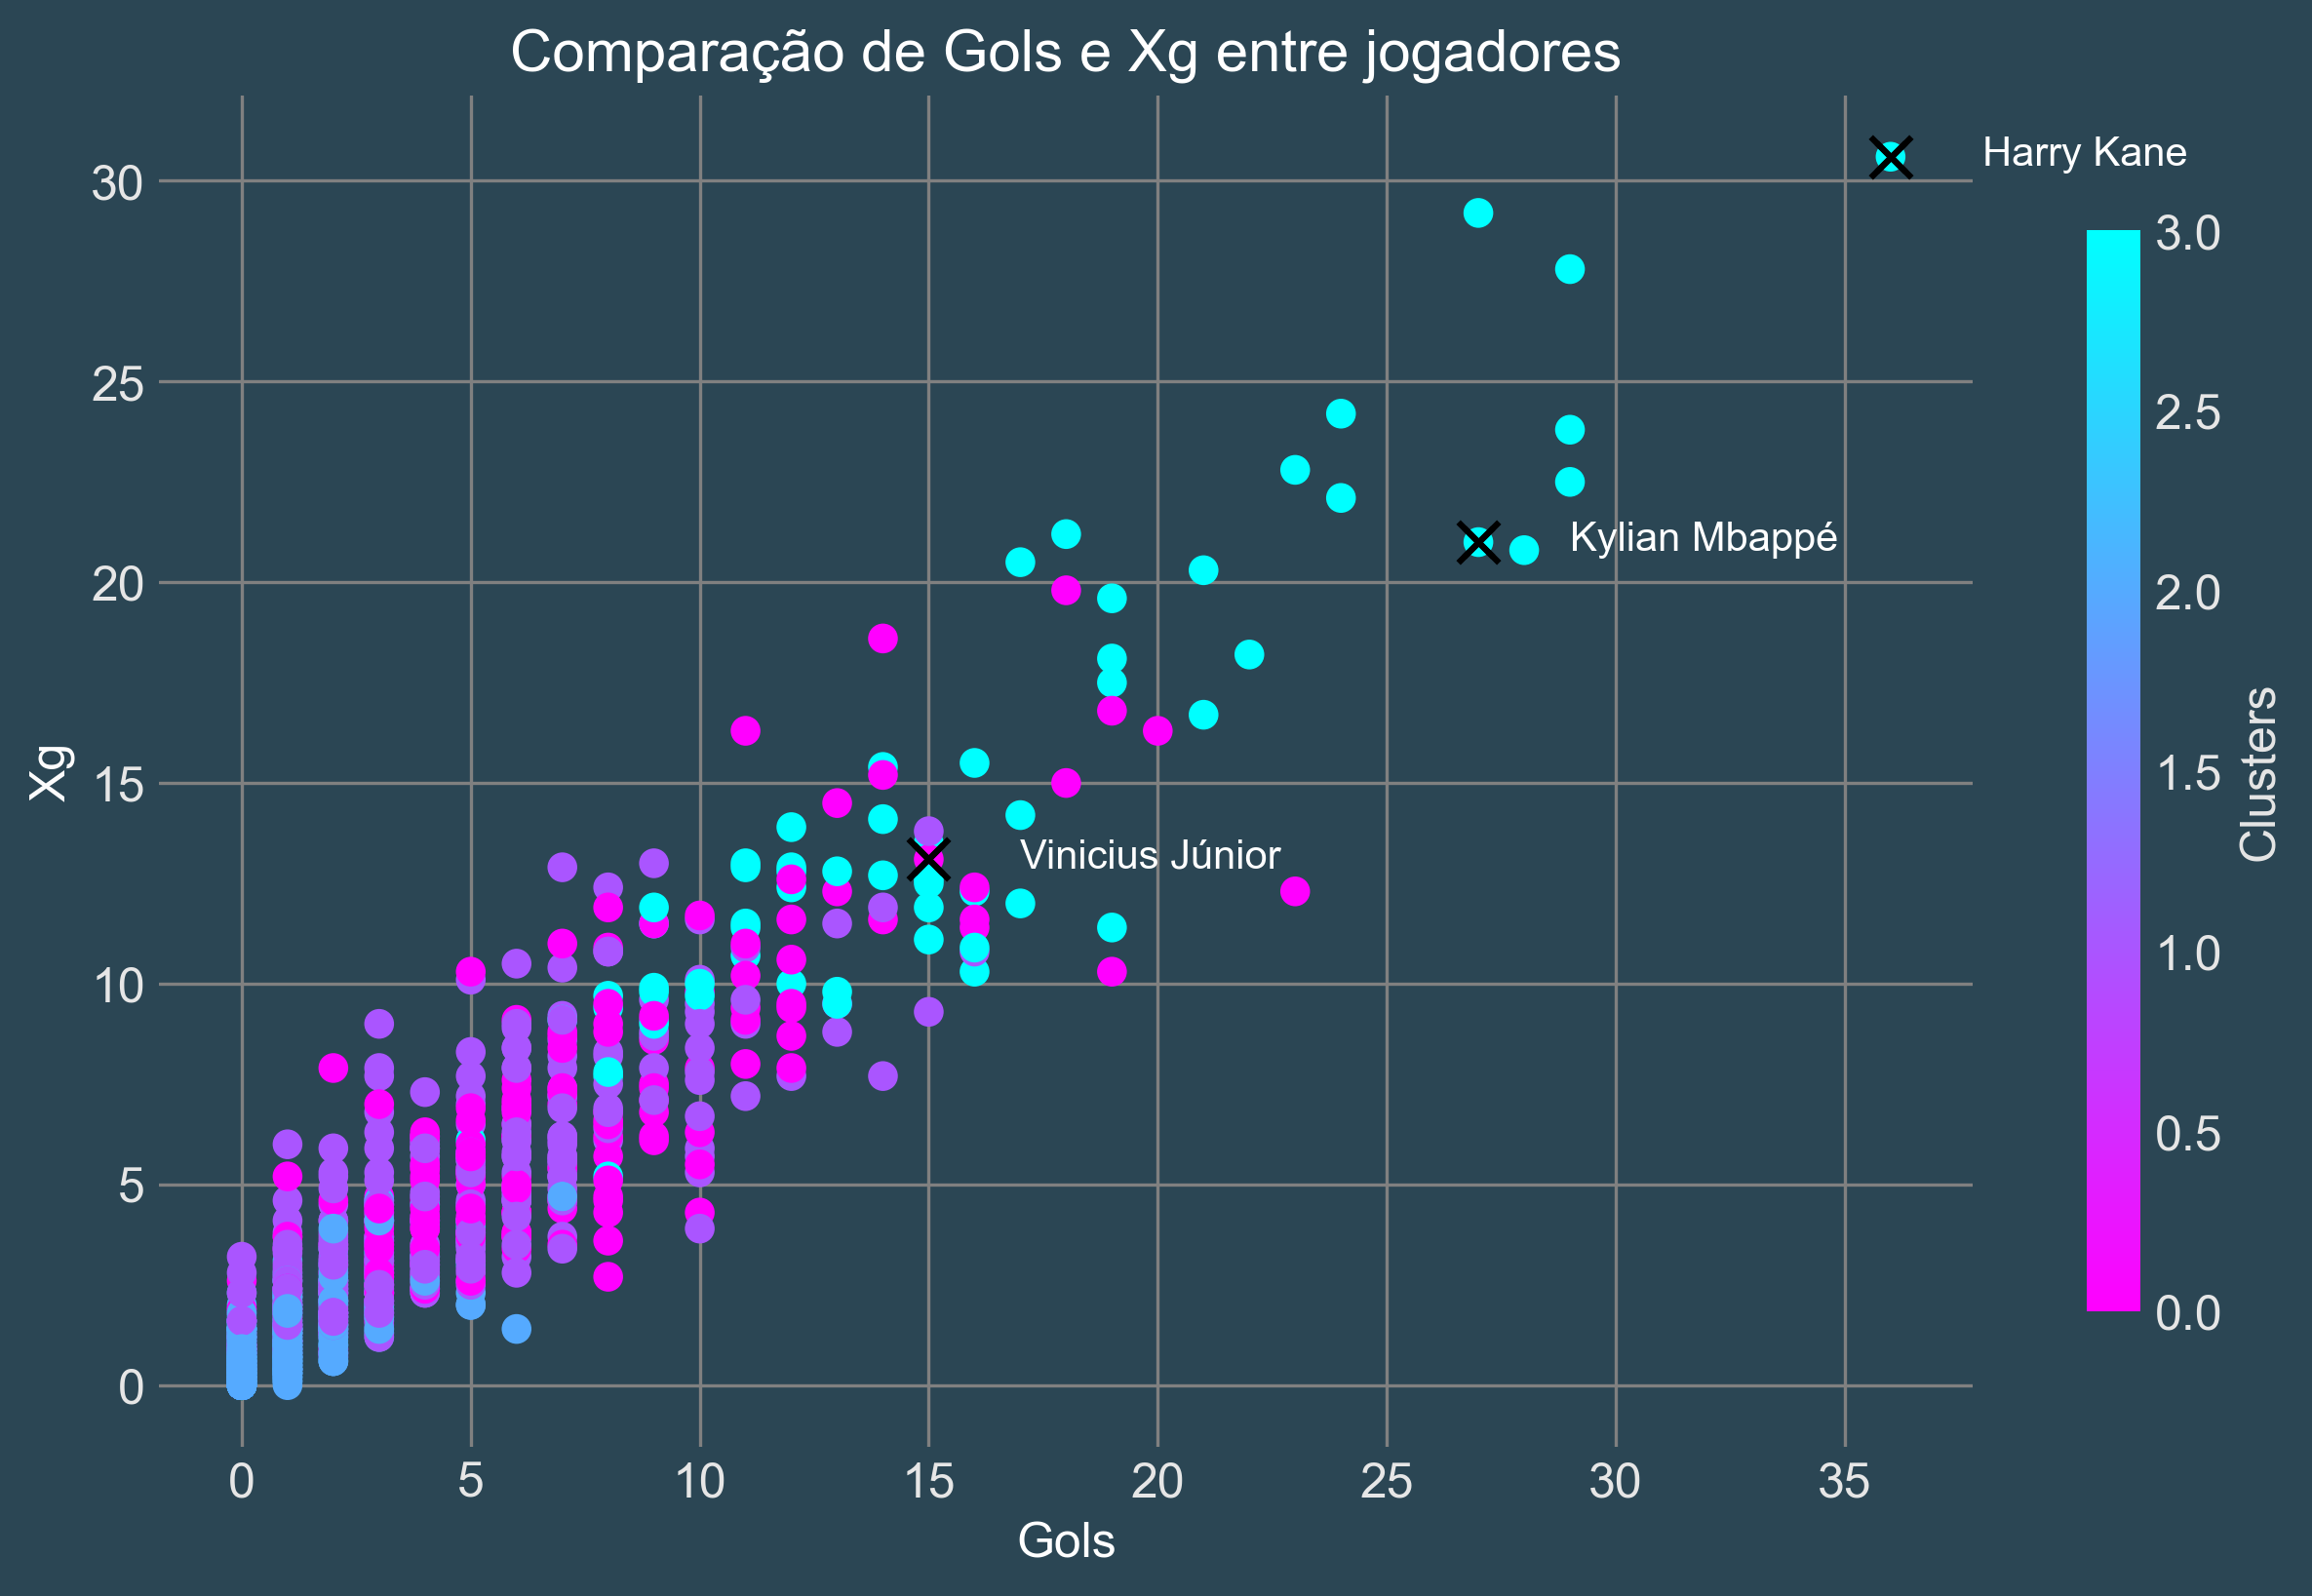

In [107]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 12

plt.style.use("cyberpunk")


for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#2b4654'  # bluish dark grey

plt.figure(figsize=(10, 6),dpi=300)
plt.grid(True, color='gray')
plt.scatter(atacantes_cluster['Gols'], atacantes_cluster['Xg'], c=atacantes_cluster['cluster_kmeans'], cmap="cool_r", label='Outros jogadores',s = 40)
plt.xlabel('Gols',color="white")
plt.ylabel('Xg',color="white")

mplcyberpunk.add_glow_effects()
plt.title('Comparação de Gols e Xg entre jogadores',color="white")
plt.colorbar(label='Clusters', shrink=0.8)
plt.grid(True)


# Adicionando marcador para o jogador específico (Kylian Mbappé)
plt.scatter(atacantes_selecionados['Gols'], atacantes_selecionados['Xg'], marker='x', s=100, c='black', label='Kylian Mbappé')

# Adicionando texto para o jogador específico
for i in range(len(atacantes_selecionados)):
    jogador = atacantes_selecionados.iloc[i]
    plt.scatter(jogador['Gols'], jogador['Xg'], marker='x', s=50, c='black', label=jogador['Jogador'])
    plt.text(jogador['Gols']+2, jogador['Xg']-0.2, jogador['Jogador'], fontsize=10, c="white",ha='left')



plt.show()

### Comparando os Gols e as Carregadas Progressivas do Vinicius Jr, Mbappé e do Harry Kane 

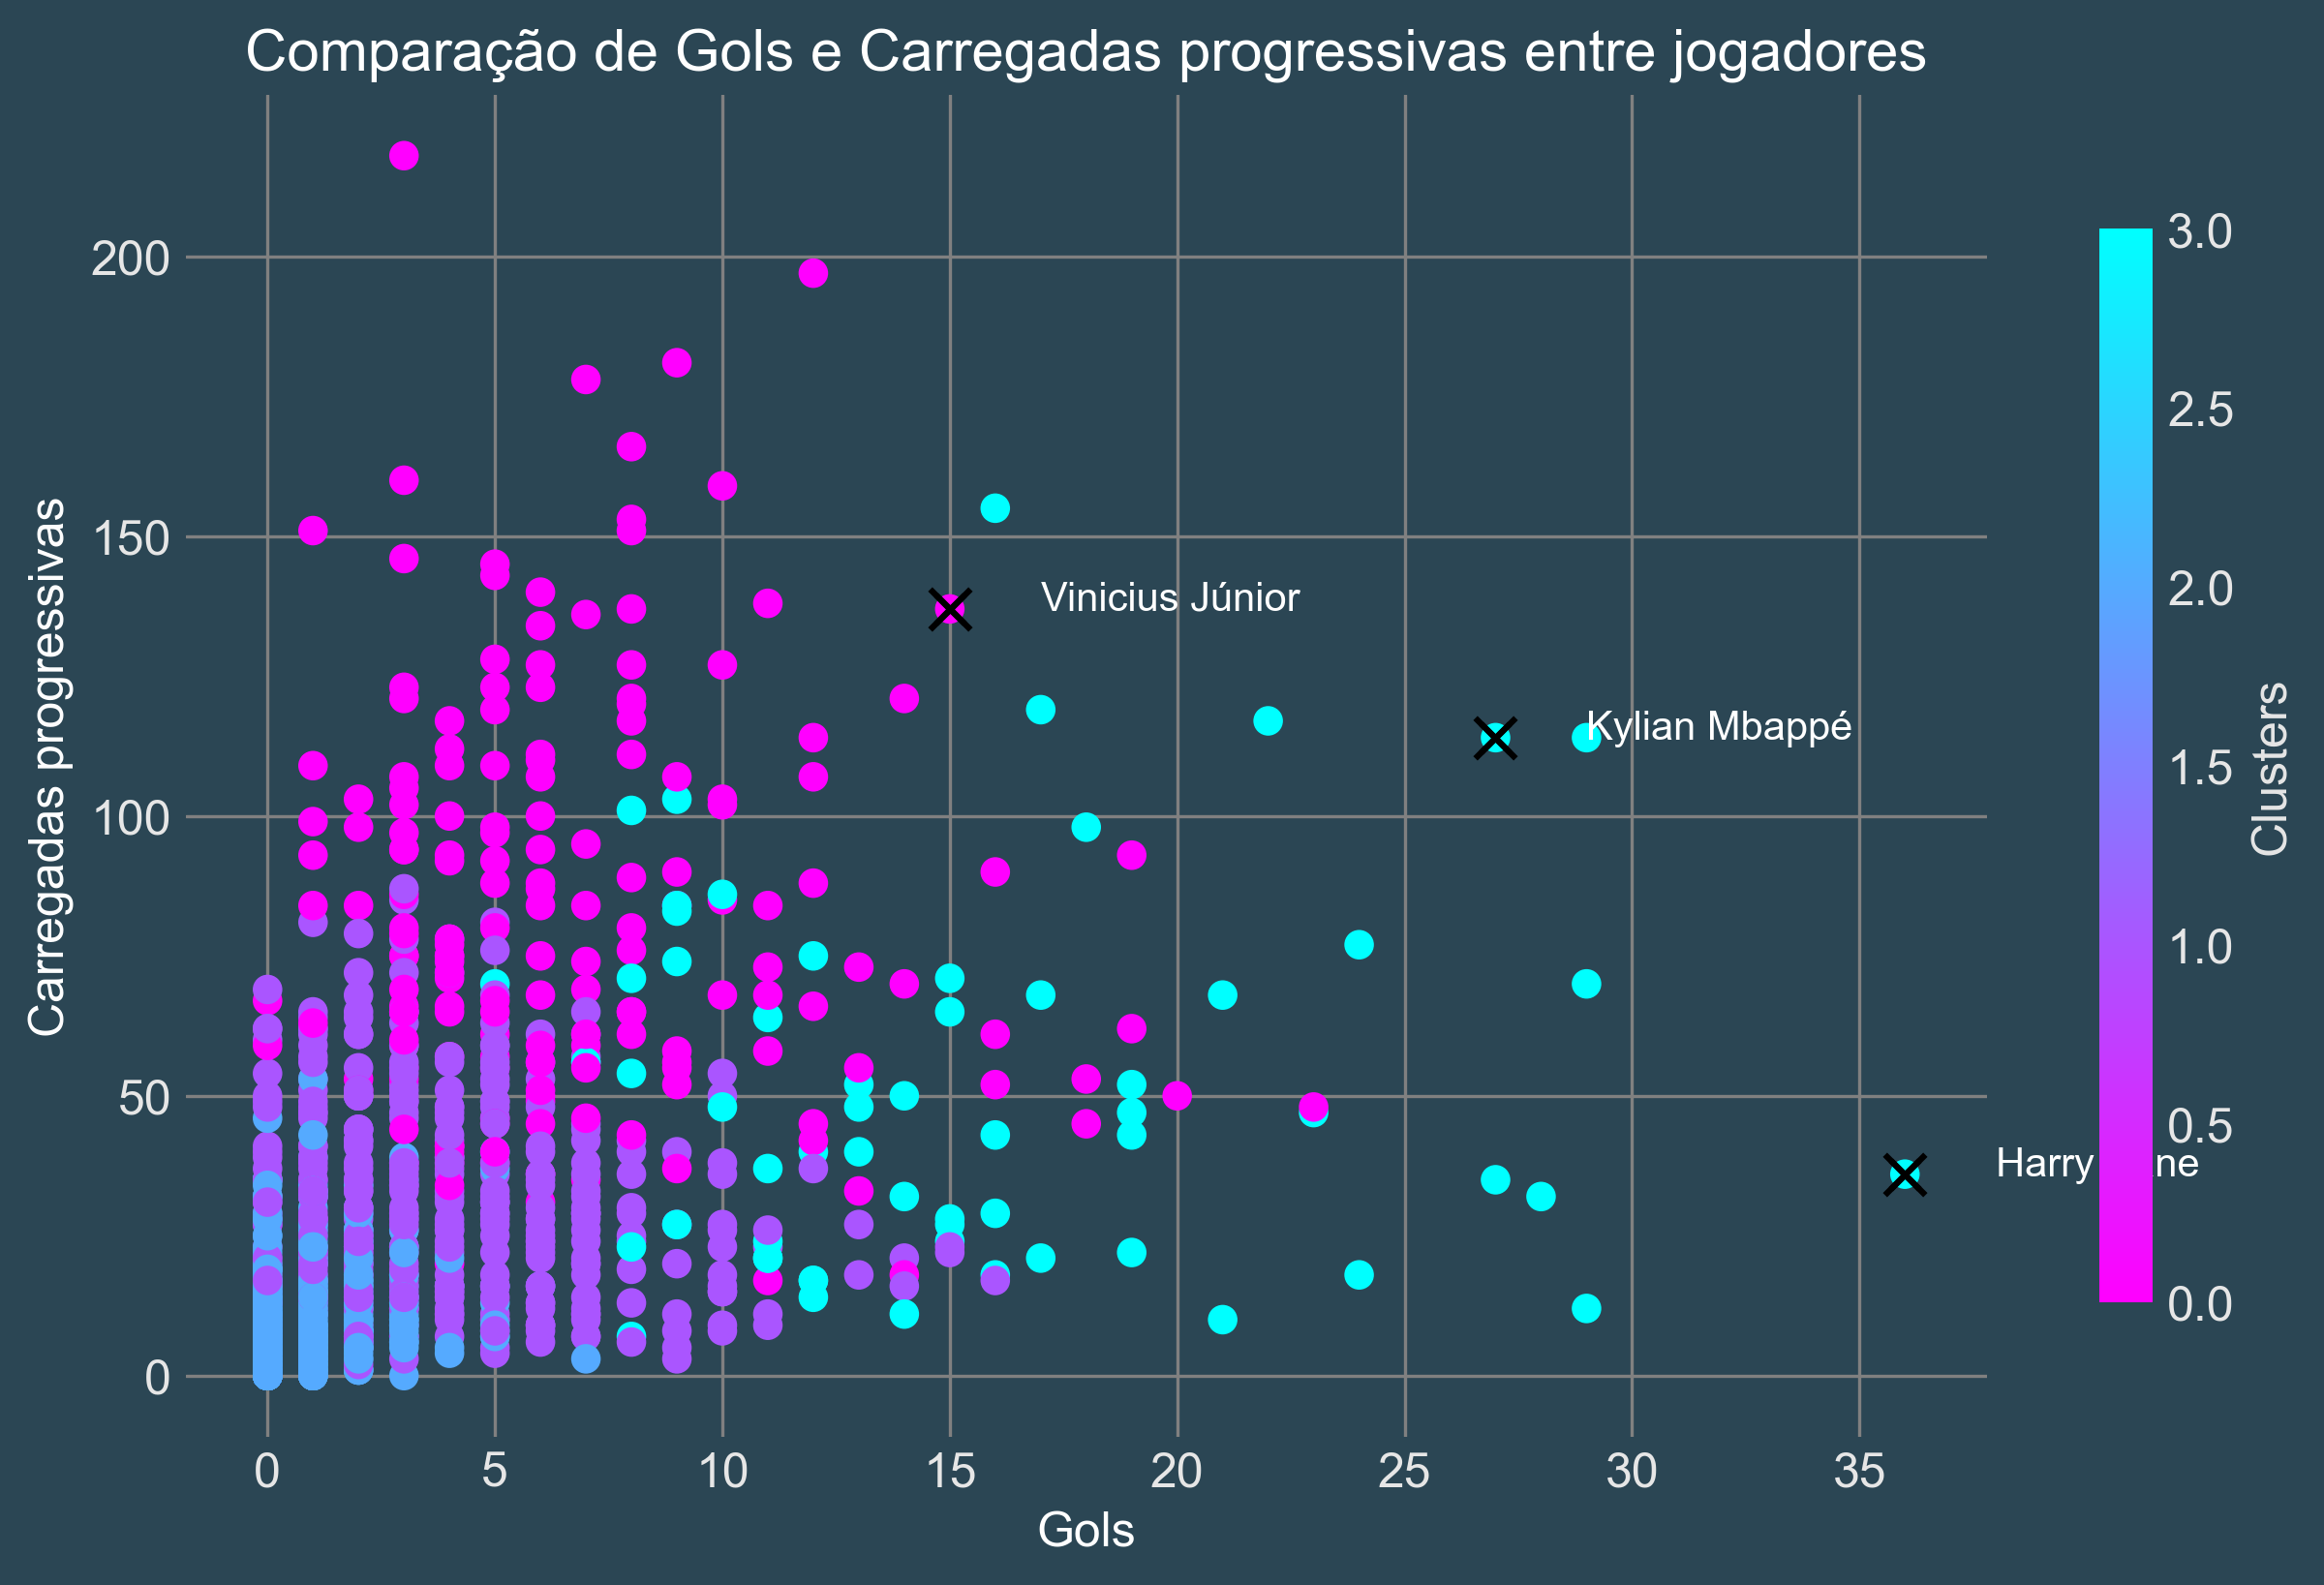

In [109]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 12

plt.style.use("cyberpunk")


for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#2b4654'  # bluish dark grey

plt.figure(figsize=(10, 6),dpi=300)
plt.grid(True, color='gray')
plt.scatter(atacantes_cluster['Gols'], atacantes_cluster['Carregadas_progressivas'], c=atacantes_cluster['cluster_kmeans'], cmap="cool_r", label='Outros jogadores',s = 40)
plt.xlabel('Gols',color="white")
plt.ylabel('Carregadas progressivas',color="white")

#mplcyberpunk.add_glow_effects()
plt.title('Comparação de Gols e Carregadas progressivas entre jogadores',color="white")
plt.colorbar(label='Clusters', shrink=0.8)
plt.grid(True)


# Adicionando marcador para o jogador específico (Kylian Mbappé)
plt.scatter(atacantes_selecionados['Gols'], atacantes_selecionados['Carregadas_progressivas'], marker='x', s=100, c='black', label='Kylian Mbappé')

# Adicionando texto para o jogador específico
for i in range(len(atacantes_selecionados)):
    jogador = atacantes_selecionados.iloc[i]
    plt.scatter(jogador['Gols'], jogador['Carregadas_progressivas'], marker='x', s=50, c='black', label=jogador['Jogador'])
    plt.text(jogador['Gols']+2, jogador['Carregadas_progressivas']-0.2, jogador['Jogador'], fontsize=10, c="white",ha='left')



plt.show()

### Comparando os Gols e as Assistências do Vinicius Jr, Mbappé e do Harry Kane 

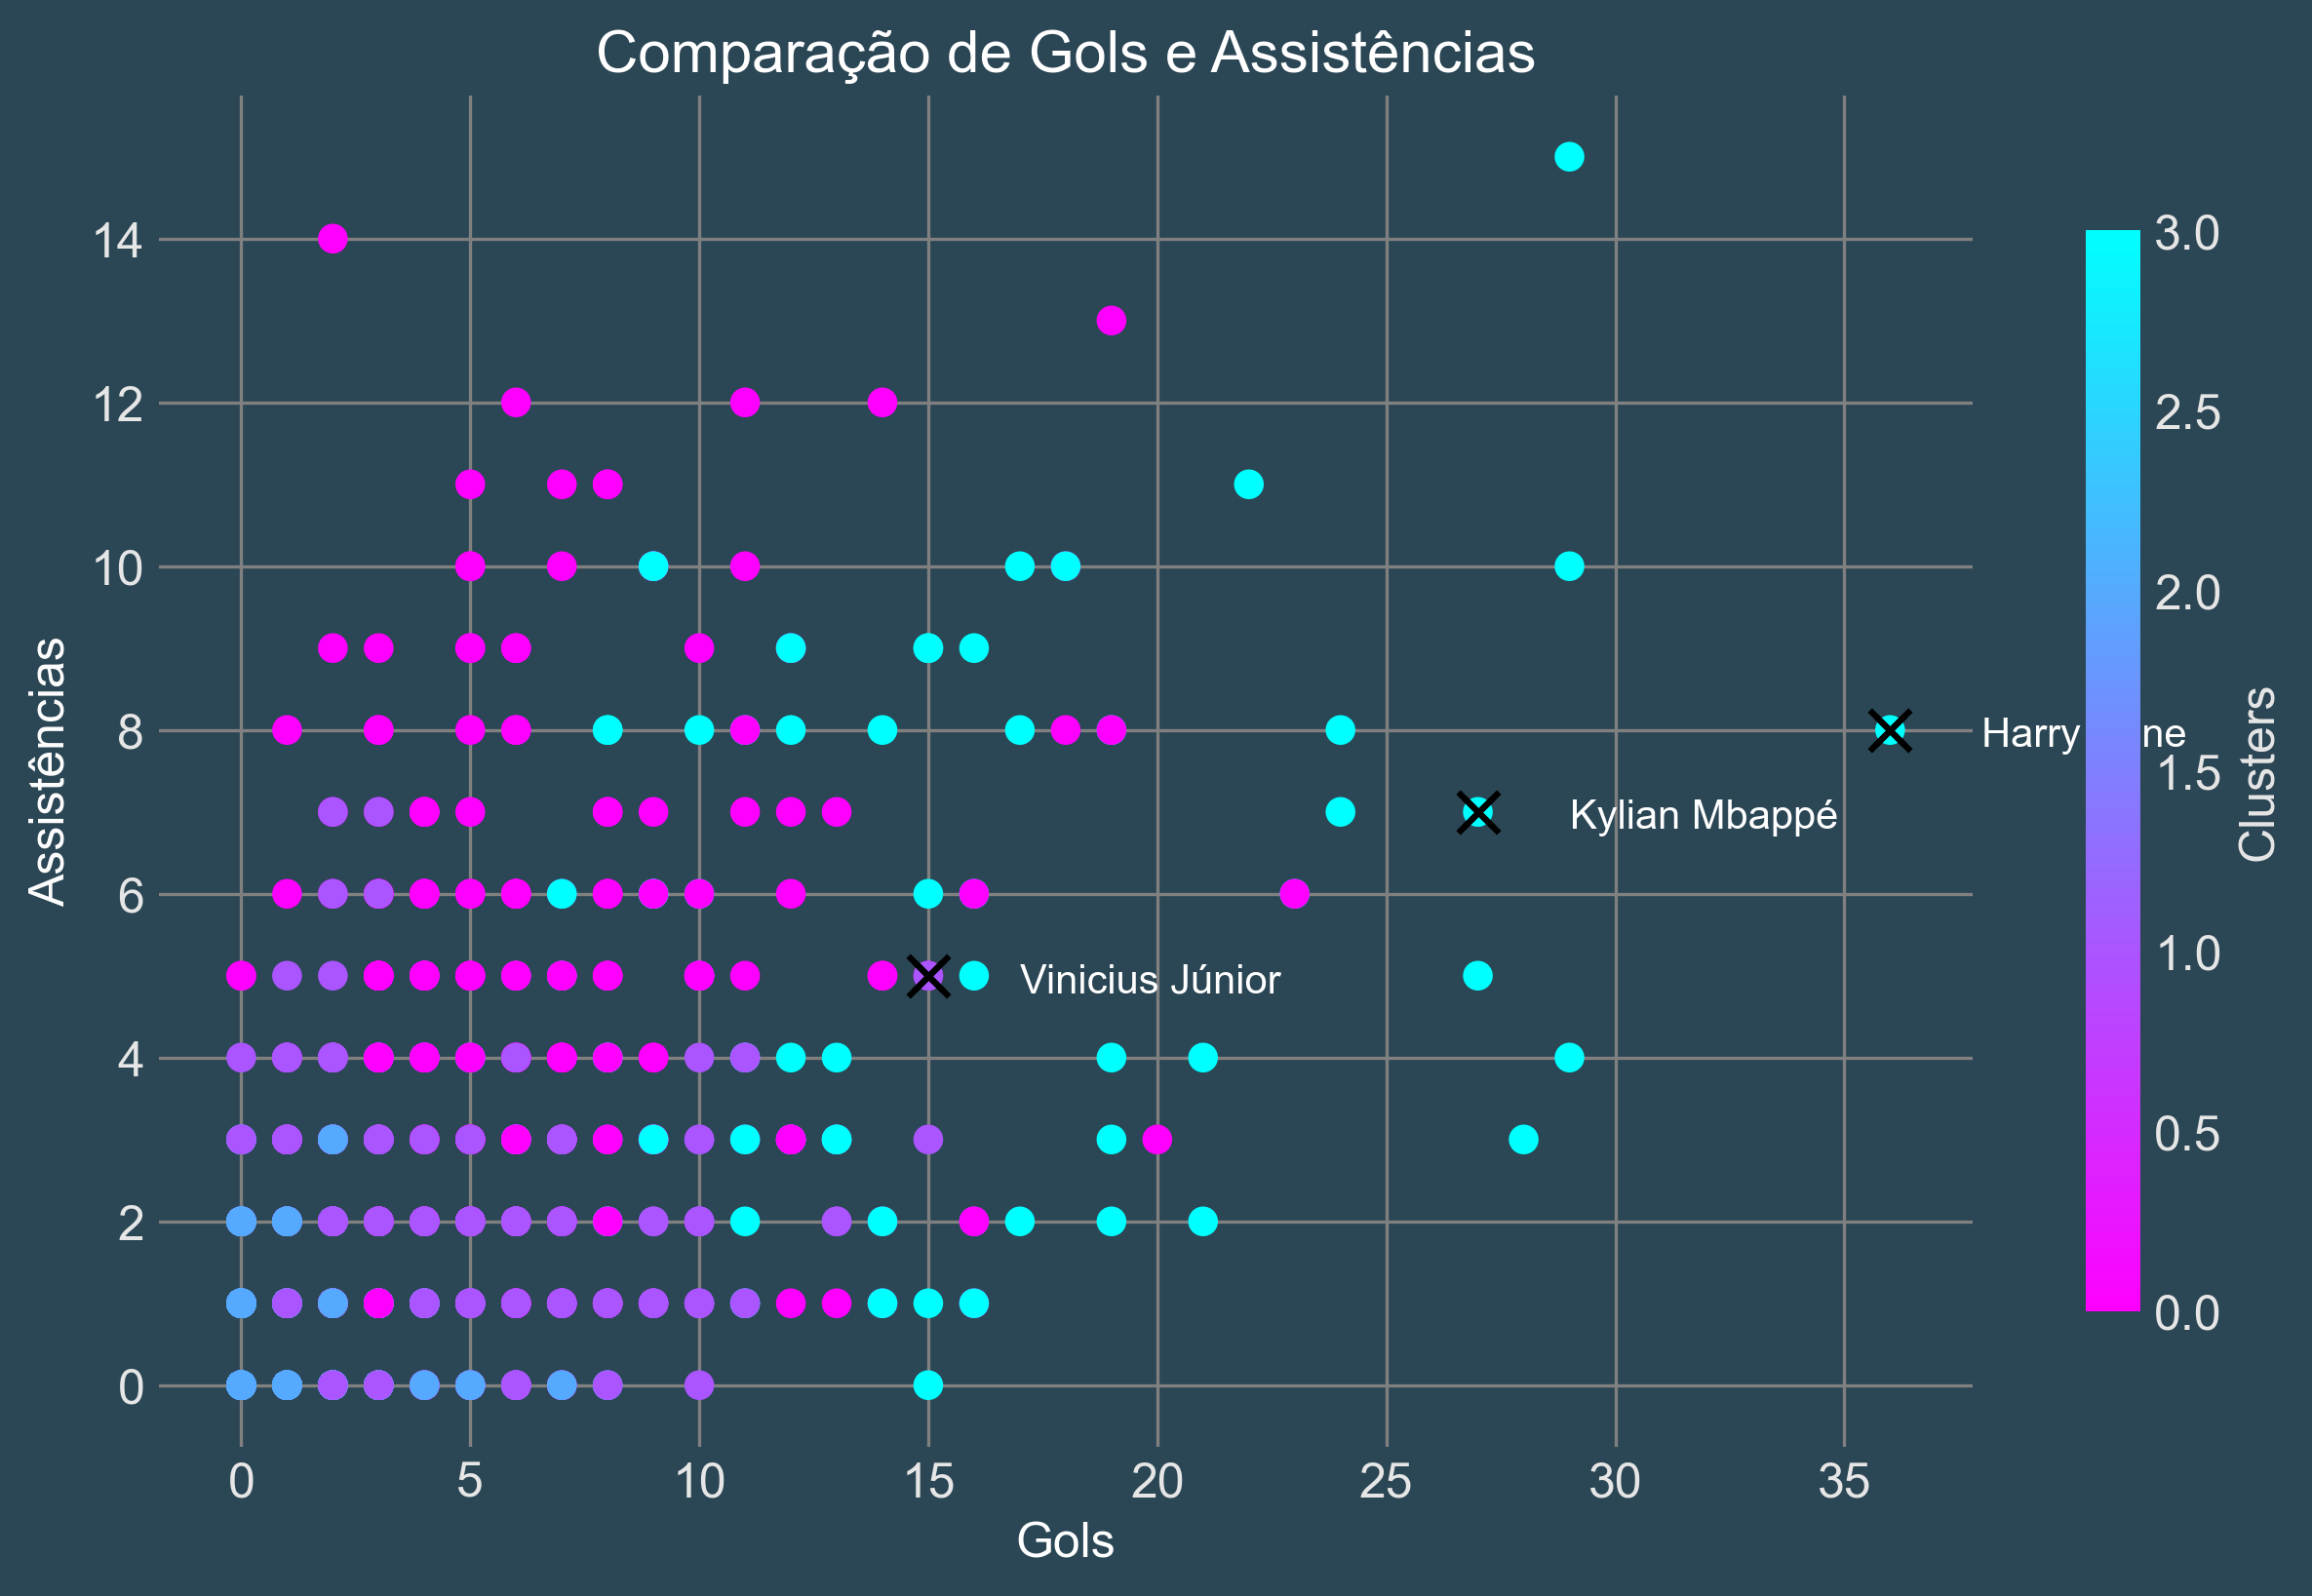

In [111]:

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 12

plt.style.use("cyberpunk")


for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#2b4654'  # bluish dark grey

plt.figure(figsize=(10, 6),dpi=300)
plt.grid(True, color='gray')
plt.scatter(atacantes_cluster['Gols'], atacantes_cluster['Assistencias'], c=atacantes_cluster['cluster_kmeans'], cmap="cool_r", label='Outros jogadores',s = 40)
plt.xlabel('Gols',color="white")
plt.ylabel('Assistências',color="white")

#mplcyberpunk.add_glow_effects()
plt.title('Comparação de Gols e Assistências',color="white")
plt.colorbar(label='Clusters', shrink=0.8)
plt.grid(True)


# Adicionando marcador para o jogador específico (Kylian Mbappé)
plt.scatter(atacantes_selecionados['Gols'], atacantes_selecionados['Assistencias'], marker='x', s=100, c='black', label='Kylian Mbappé')

# Adicionando texto para o jogador específico
for i in range(len(atacantes_selecionados)):
    jogador = atacantes_selecionados.iloc[i]
    plt.scatter(jogador['Gols'], jogador['Assistencias'], marker='x', s=50, c='black', label=jogador['Jogador'])
    plt.text(jogador['Gols']+2, jogador['Assistencias']-0.2, jogador['Jogador'], fontsize=10, c="white",ha='left')



plt.show()

### Criando um dataset com os jogadores mais parecidos com O Mbappé definidos pela nossa tpecnica de clusterização

In [124]:
grupo_especial = atacantes_cluster.loc[atacantes_cluster['nome_cluster'] == 'Grupo 4']

### Selecionando os jogadores que tenham 25 anos ou menos e mais de 20 gols na temporada para nossa seleção de talentos para substituir o Mbappé

In [128]:
jogadores_selecionados = grupo_especial[(grupo_especial["Idade"] <= 25) & (grupo_especial["Gols"] > 20)]
print(jogadores_selecionados)

                Jogador    Nacao Posicao           Equipe  Idade  \
341         Loïs Openda   be BEL      AT       RB Leipzig   23.0   
664    Santiago Giménez   mx MEX      AT        Feyenoord   22.0   
857   Vangelis Pavlidis   gr GRE      AT       AZ Alkmaar   24.0   
1983      Kylian Mbappé   fr FRA      AT        Paris S-G   24.0   
2404     Erling Haaland   no NOR      AT  Manchester City   23.0   
2428     Alexander Isak   se SWE      AT    Newcastle Utd   23.0   
2596        Cole Palmer  eng ENG   AT,LT          Chelsea   21.0   
2963    Viktor Gyökeres   se SWE      AT      Sporting CP   25.0   

      Jogos_disputados  Jogos_iniciados  Gols  Assistencias  Penaltis_batidos  \
341                 34               33    24             7                 2   
664                 30               29    23             6                 2   
857                 34               34    29             4                 1   
1983                29               24    27             7    